In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will be performing eda on this dataset to understand the salary and the jobs of the engineers are offered after completing there graduate program. 

In [2]:
df=pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.shape

(3998, 38)

In [8]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [9]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [10]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B99F49A3C8>,
      dtype=object)

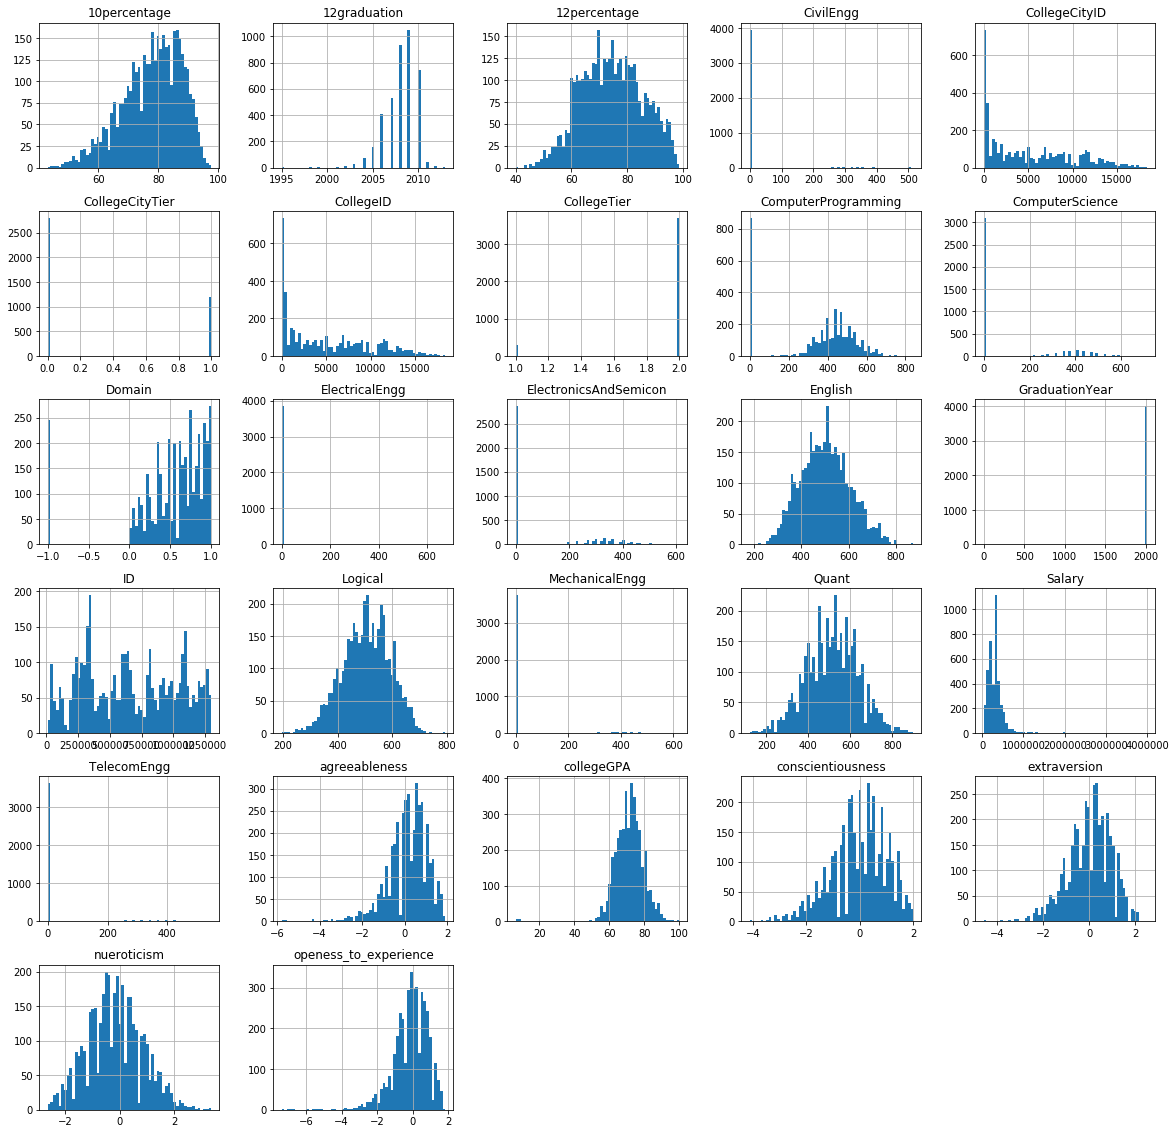

In [17]:
df.hist(bins=60,figsize=(20,20))

### Salary

(array([3.398e+03, 5.500e+02, 2.700e+01, 6.000e+00, 8.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([  35000.,  431500.,  828000., 1224500., 1621000., 2017500.,
        2414000., 2810500., 3207000., 3603500., 4000000.]),
 <a list of 10 Patch objects>)

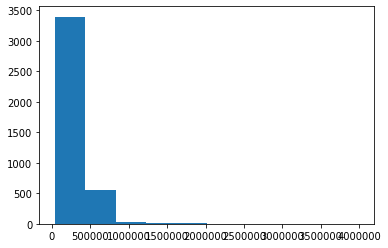

In [24]:
plt.hist(x=df.Salary)

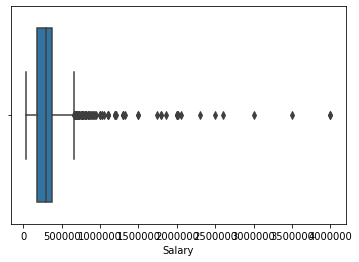

In [18]:
sns.boxplot(x=df.Salary)

We have outlier in our data and if we want we can remove it

In [33]:
outlier=df[(df.Salary > df.Salary.mean() - 2*df.Salary.std()) & (df.Salary < df.Salary.mean() + 2*df.Salary.std())]

In [34]:
print(df.shape)
print(outlier.shape)

(3998, 38)
(3927, 38)


In ouliers there will be few points missing

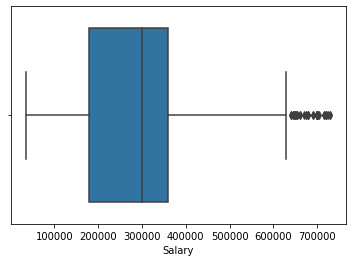

In [35]:
sns.boxplot(x=outlier.Salary)

The average salary is between 2 to 4 LPA, but still we have outlier, we can decrease standard deviation to remove them.

(array([226., 533., 888., 613., 809., 443., 214.,  81.,  84.,  36.]),
 array([ 35000., 104500., 174000., 243500., 313000., 382500., 452000.,
        521500., 591000., 660500., 730000.]),
 <a list of 10 Patch objects>)

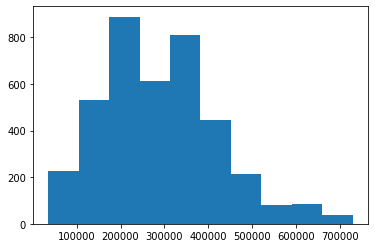

In [36]:
plt.hist(x=outlier.Salary)

### Gender

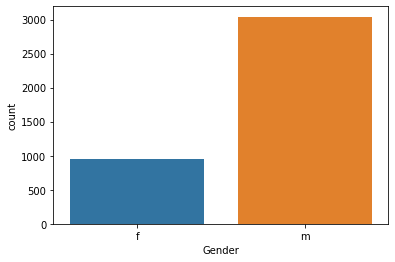

In [37]:
sns.countplot(data=df,x='Gender')

In [38]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

A huge hap between gender of male and female

### 10th percentage

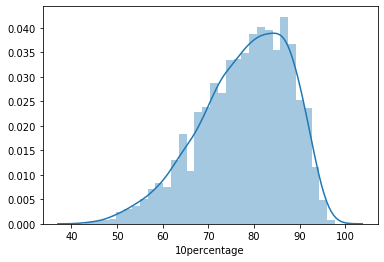

In [44]:
sns.distplot(df['10percentage'])

From above we can see average is near 80 and the graph is left skewed

In [45]:
df['10percentage'].mean()

77.9254427213606

lets check for outlier which are clearly visible on left side

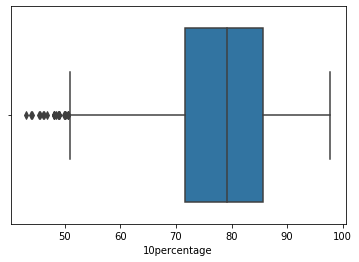

In [46]:
sns.boxplot(x=df['10percentage'])

we will remove outlier by using mean and standard deviation

In [50]:
outlier=df[(df['10percentage']>df['10percentage'].mean() - 3*df['10percentage'].std())
           & (df['10percentage']<df['10percentage'].mean() + 3*df['10percentage'].std())]

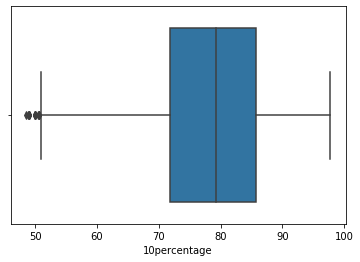

In [51]:
sns.boxplot(x=outlier['10percentage'])

In [52]:
outlier=df[(df['10percentage']>df['10percentage'].mean() - 2*df['10percentage'].std())
           & (df['10percentage']<df['10percentage'].mean() + 2*df['10percentage'].std())]

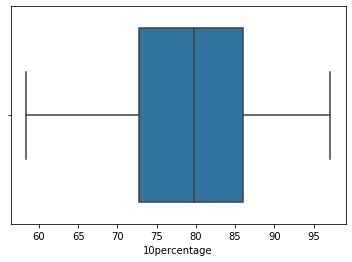

In [53]:
sns.boxplot(x=outlier['10percentage'])

we have removed all the outlier

### Id

Id will be unique for everyone

(array([307., 329., 648., 276., 516., 263., 412., 372., 482., 393.]),
 array([  11244. ,  139947.1,  268650.2,  397353.3,  526056.4,  654759.5,
         783462.6,  912165.7, 1040868.8, 1169571.9, 1298275. ]),
 <a list of 10 Patch objects>)

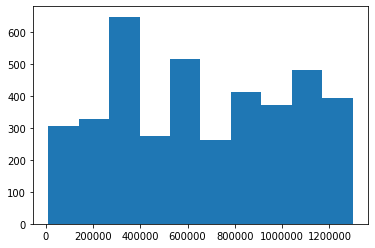

In [57]:
plt.hist(x=df['ID'])

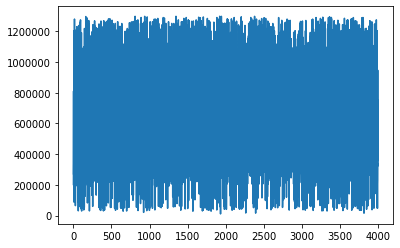

In [58]:
plt.plot(df['ID'])

### DOJ

In [59]:
df['DOJ'].value_counts()

2014-07-01    199
2014-06-01    180
2014-08-01    178
2014-09-01    142
2014-01-01    142
             ... 
2004-08-01      1
2015-11-01      1
2006-01-01      1
2007-09-01      1
2015-12-01      1
Name: DOJ, Length: 81, dtype: int64

In [61]:
df['DOJ'].dt.year.value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
1991       1
2008       1
2006       1
2004       1
Name: DOJ, dtype: int64

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 2.020e+02, 1.365e+03, 2.424e+03]),
 array([726984. , 727878.9, 728773.8, 729668.7, 730563.6, 731458.5,
        732353.4, 733248.3, 734143.2, 735038.1, 735933. ]),
 <a list of 10 Patch objects>)

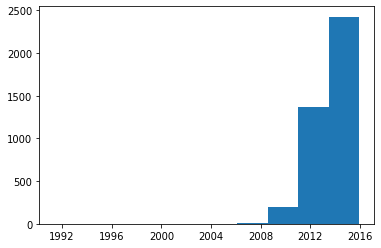

In [63]:
plt.hist(df['DOJ'])

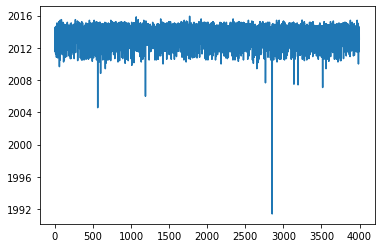

In [64]:
plt.plot(df['DOJ'])

We can say huge amount of employee have joined recently and few are from a long time

### DOL 

In [65]:
df['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2011-08-01 00:00:00       1
2011-02-01 00:00:00       1
2005-03-01 00:00:00       1
2008-03-01 00:00:00       1
2015-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

### Designation

In [69]:
df.Designation.value_counts(ascending=False)

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
it developer                           1
bss engineer                           1
lecturer & electrical maintenance      1
ruby on rails developer                1
senior research fellow                 1
Name: Designation, Length: 419, dtype: int64

(array([2107.,  906.,  289.,  207.,  126.,  102.,   79.,   77.,   58.,
          47.]),
 array([  0. ,  41.8,  83.6, 125.4, 167.2, 209. , 250.8, 292.6, 334.4,
        376.2, 418. ]),
 <a list of 10 Patch objects>)

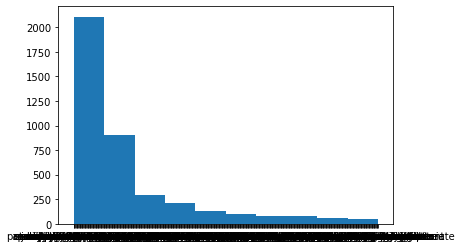

In [70]:
plt.hist(df['Designation'])

many employee are into engineering role

### job city

In [74]:
df['JobCity'].value_counts(ascending=False).head(20)

Bangalore        627
-1               461
Noida            368
Hyderabad        335
Pune             290
Chennai          272
Gurgaon          198
New Delhi        196
Mumbai           108
Kolkata           98
Jaipur            46
Mysore            36
Lucknow           36
Navi Mumbai       32
chennai           27
Greater Noida     26
pune              26
Chandigarh        26
Indore            24
Bhubaneswar       22
Name: JobCity, dtype: int64

Many people are in cities which are more relevant to IT industry

### DOB

In [78]:
df['DOB'].dt.year.value_counts()

1991    979
1992    855
1990    774
1989    522
1988    308
1993    299
1987    116
1986     62
1994     31
1985     28
1984     13
1983      4
1982      2
1995      2
1997      1
1977      1
1981      1
Name: DOB, dtype: int64

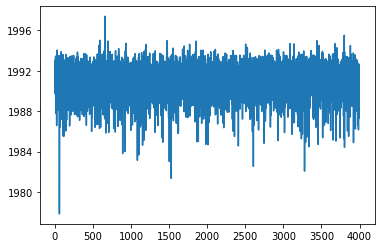

In [81]:
plt.plot(df['DOB'])

(array([1.000e+00, 1.000e+00, 5.000e+00, 3.200e+01, 1.270e+02, 6.530e+02,
        1.518e+03, 1.529e+03, 1.300e+02, 2.000e+00]),
 array([722022. , 722736.9, 723451.8, 724166.7, 724881.6, 725596.5,
        726311.4, 727026.3, 727741.2, 728456.1, 729171. ]),
 <a list of 10 Patch objects>)

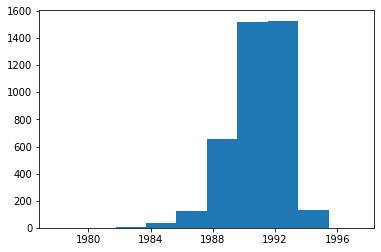

In [82]:
plt.hist(df['DOB'])

Many people were born in 1988 to 1992

### 10th board

In [83]:
df['10board'].value_counts()

cbse                              1395
state board                       1164
0                                  350
icse                               281
ssc                                122
                                  ... 
jharkhand secondary board            1
andhra pradesh board ssc             1
bright way college, (up board)       1
kerala university                    1
stmary higher secondary              1
Name: 10board, Length: 275, dtype: int64

Majority is with cbse and state board

### 12th graduation

In [91]:
df['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
2013       1
1999       1
1995       1
1998       1
Name: 12graduation, dtype: int64

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.600e+01, 2.500e+01, 2.330e+02,
        9.350e+02, 1.987e+03, 7.880e+02, 1.100e+01]),
 array([1995. , 1996.8, 1998.6, 2000.4, 2002.2, 2004. , 2005.8, 2007.6,
        2009.4, 2011.2, 2013. ]),
 <a list of 10 Patch objects>)

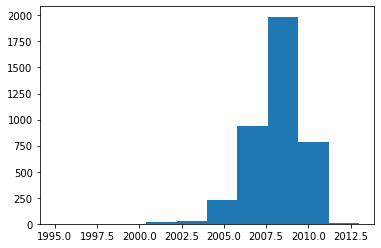

In [94]:
plt.hist(df['12graduation'])

Majority of people graduated from 2005 to 2010

### 12 percentage

In [95]:
df['12percentage'].value_counts()

70.00    72
72.00    68
74.00    63
68.00    58
62.00    58
         ..
87.14     1
77.54     1
83.16     1
72.90     1
56.22     1
Name: 12percentage, Length: 801, dtype: int64

In [96]:
df['12percentage'].mean()

74.46636568284127

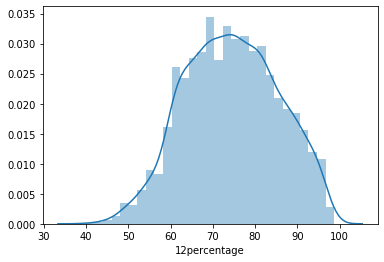

In [97]:
sns.distplot(df['12percentage'])

majoity of people scored between 70 to 80 percent

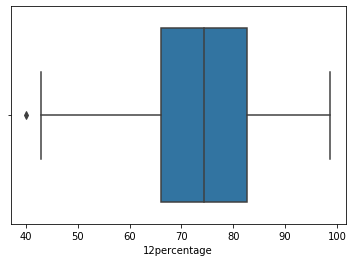

In [98]:
sns.boxplot(df['12percentage'])

A very few outlier, so no need to worry

### 12 board

In [99]:
df['12board'].value_counts()

cbse                                            1400
state board                                     1254
0                                                359
icse                                             129
up board                                          87
                                                ... 
scte vt orissa                                     1
secondary board of rajasthan                       1
government polytechnic mumbai , mumbai board       1
msbshse,pune                                       1
mbose                                              1
Name: 12board, Length: 340, dtype: int64

Majority is with cbse and stateboard

### college id

In [105]:
df['CollegeID'].value_counts(ascending=False)

272      94
64       38
11759    35
44       35
47       33
         ..
5653      1
7547      1
13209     1
15735     1
6143      1
Name: CollegeID, Length: 1350, dtype: int64

(array([1499.,  439.,  412.,  346.,  421.,  207.,  326.,  221.,   88.,
          39.]),
 array([2.00000e+00, 1.84270e+03, 3.68340e+03, 5.52410e+03, 7.36480e+03,
        9.20550e+03, 1.10462e+04, 1.28869e+04, 1.47276e+04, 1.65683e+04,
        1.84090e+04]),
 <a list of 10 Patch objects>)

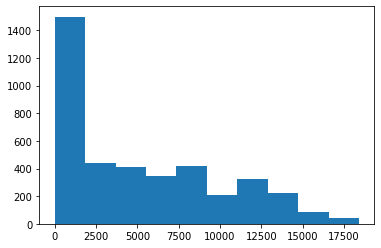

In [106]:
plt.hist(df['CollegeID'])

there are many people from few colleges

### College GPA

In [108]:
df.collegeGPA.value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
71.00     75
        ... 
99.00      1
51.00      1
87.40      1
71.59      1
60.85      1
Name: collegeGPA, Length: 1282, dtype: int64

In [109]:
df.collegeGPA.mean()

71.48617058529268

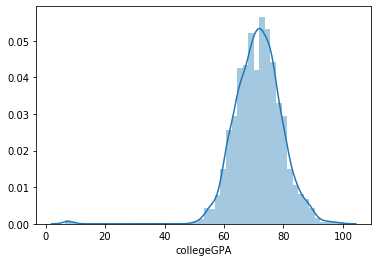

In [110]:
sns.distplot(df['collegeGPA'])

many students scored between 70 to 80 percent and we can see some outlier who got less marks

### college state

In [113]:
df.CollegeState.value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

(array([1329.,  532.,  825.,  499.,  398.,  198.,  147.,   44.,   16.,
          10.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

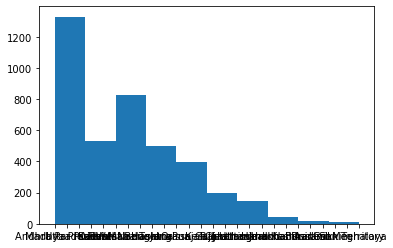

In [114]:
plt.hist(df['CollegeState'])

Many students are from Uttar Pradesh

### Specialization

In [116]:
df.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

many students are from computer science and electronics 

### ComputerScience

In [118]:
df.ComputerScience.value_counts()

-1      3096
 407     128
 376     123
 346     118
 438     111
 469      80
 315      77
 500      64
 284      50
 530      45
 253      30
 561      22
 592      14
 223      14
 623      10
 653       9
 192       3
 715       2
 684       1
 130       1
Name: ComputerScience, dtype: int64

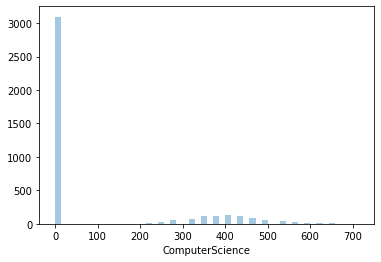

In [123]:
sns.distplot(df['ComputerScience'],kde=False)

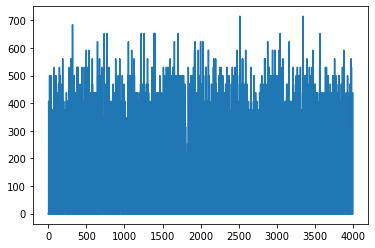

In [124]:
plt.plot(df['ComputerScience'])

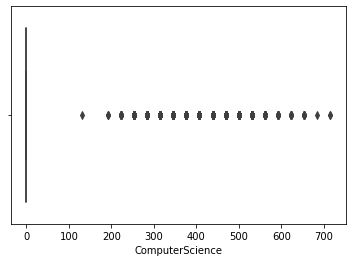

In [125]:
sns.boxplot(df['ComputerScience'])

THere is a problem here as many with score of -1 which might be not attempted due to which we are unable to plot a correct boxplot, but by displot we can say that many students scored 400 to 500

## Bivariate Analysis

### relation between both numerical columns

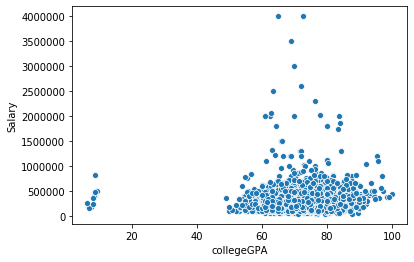

In [127]:
sns.scatterplot(x=df.collegeGPA, y=df.Salary)

students who have 65% to 80% are getting good salary

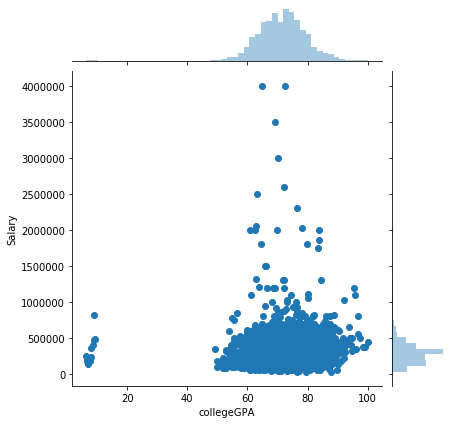

In [129]:
sns.jointplot(x=df.collegeGPA,y=df.Salary)

### relation between numerical and categorical

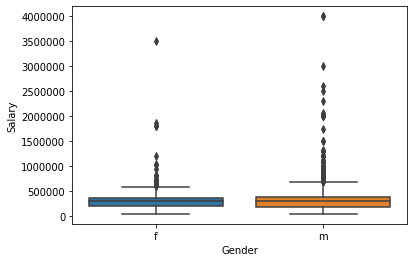

In [130]:
sns.boxplot(x=df.Gender,y=df.Salary)

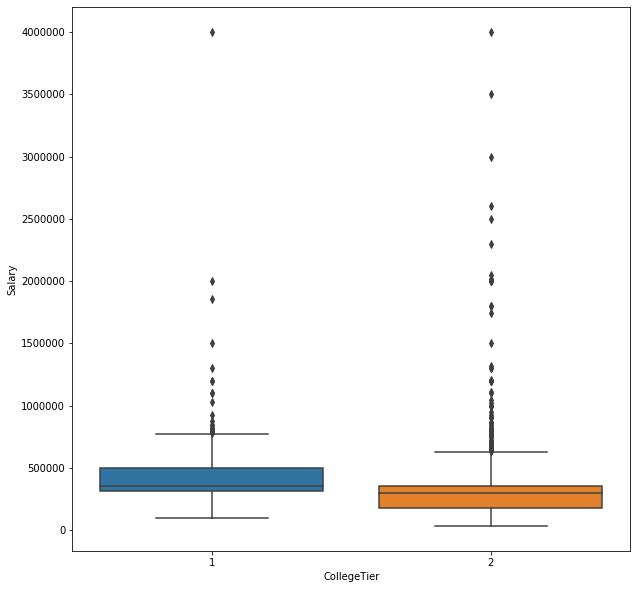

In [141]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df.CollegeTier,y=df.Salary)

### Research Questions
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialisation?(i.e. Does the preference of Specialisation depend on the Gender?)

In [143]:
df.shape

(3998, 38)

In [142]:
df[df.Designation.isin(['programmer analyst','software engineer','hardware engineer','associate engineer'])]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
19,466888,325000,2014-09-01,present,software engineer,Pune,f,1990-11-30,79.00,cbse,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295
20,140069,320000,2010-11-01,2012-09-01 00:00:00,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444
21,339689,200000,2012-08-01,2013-12-01 00:00:00,software engineer,-1,f,1991-08-20,75.67,up,...,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539
24,963123,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,1094324,340000,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,m,1992-10-23,77.20,state board,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,212055,550000,2013-07-01,2014-04-01 00:00:00,software engineer,Bangalore,m,1989-07-22,69.16,up board,...,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.41480,-1.2354
3981,1077872,220000,2014-09-01,present,software engineer,Gurgaon,m,1991-12-17,53.40,cbse,...,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386
3984,305041,480000,2011-12-01,present,software engineer,Gurgaon,f,1990-01-18,89.80,cbse,...,-1,-1,-1,-1,-1,-0.2628,0.1888,0.3817,-0.29020,1.6082
3989,1204604,300000,2014-09-01,present,software engineer,Bangalore,m,1991-11-23,74.88,state board,...,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721


In [147]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [151]:
df[df.Specialization.str.contains('computer')]['Specialization'].unique()

array(['computer engineering', 'computer science & engineering',
       'computer application', 'electronics and computer engineering',
       'computer science and technology',
       'computer and communication engineering', 'computer networking',
       'computer science'], dtype=object)

we will only consider computer science engineering

In [155]:
df[df.Specialization=='computer science & engineering'].Salary

6       300000
18      120000
24      335000
25      435000
31      340000
         ...  
3969    330000
3975    300000
3981    220000
3989    300000
3996    200000
Name: Salary, Length: 744, dtype: int64

In [175]:
a=df[df.Designation.isin(['programmer analyst','software engineer','hardware engineer','associate engineer'])]['Designation'].values
a

array(['software engineer', 'software engineer', 'software engineer',
       'programmer analyst', 'software engineer', 'software engineer',
       'programmer analyst', 'software engineer', 'software engineer',
       'software engineer', 'software engineer', 'software engineer',
       'programmer analyst', 'software engineer', 'software engineer',
       'software engineer', 'software engineer', 'software engineer',
       'programmer analyst', 'software engineer', 'software engineer',
       'software engineer', 'programmer analyst', 'programmer analyst',
       'software engineer', 'software engineer', 'software engineer',
       'programmer analyst', 'software engineer', 'software engineer',
       'software engineer', 'software engineer', 'programmer analyst',
       'hardware engineer', 'software engineer', 'software engineer',
       'software engineer', 'software engineer', 'associate engineer',
       'software engineer', 'programmer analyst', 'software engineer',
       'so

In [176]:
b=df[df.Specialization=='computer science & engineering'].Salary.values
b

array([ 300000,  120000,  335000,  435000,  340000,  215000,  145000,
        205000,  390000,  400000,  250000,  300000,  250000,  200000,
        240000,  120000,  120000,  300000,  220000, 1500000,  300000,
        460000,  120000,  340000,  330000,  300000,  325000,  205000,
        145000,  235000,  290000,  145000,  275000,  340000,  200000,
        375000,  275000,  180000,   70000,  305000,  350000,  115000,
        325000,  360000,  240000,  100000,  180000,  300000,  285000,
        300000,  170000,  370000,  120000,  350000,   95000,  325000,
        305000,  115000,  105000,  425000,  305000,  500000,  110000,
        560000,  360000,  700000,  300000,  320000,  315000,  320000,
        300000,  135000,  785000,  120000,  330000,  210000,  700000,
        220000,  320000,  250000,  340000,  275000,  100000,  300000,
        205000,  325000,  100000,  105000,  475000,  325000,  180000,
        120000,  300000,  240000,  240000,  335000,  190000,  300000,
         55000,  325

In [185]:
df[(df.Specialization=='computer science & engineering') & (df.Designation.isin(['programmer analyst','software engineer','hardware engineer','associate engineer'])) & (df.GraduationYear==2014)]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,963123,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692
31,1094324,340000,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,m,1992-10-23,77.20,state board,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.5021,0.2889
52,794209,400000,2015-04-01,present,software engineer,Navi Mumbai,m,1992-03-09,85.20,icse,...,-1,-1,-1,-1,-1,1.1336,0.3789,1.0859,0.6530,0.2889
55,989860,250000,2014-08-01,present,software engineer,Mangalore,m,1992-02-13,90.80,state board,...,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.1601,-0.4776
130,902366,325000,2014-09-01,present,software engineer,Greater Noida,m,1992-01-10,82.80,cbse,...,438,-1,-1,-1,-1,-0.1590,0.0459,0.7785,-1.1218,-0.0943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1100909,325000,2014-11-01,present,software engineer,Bangalore,m,1992-08-09,91.68,state board,...,438,-1,-1,-1,-1,0.8463,0.8784,1.7007,-2.0092,1.2470
3778,1083136,300000,2014-10-01,2015-04-01 00:00:00,software engineer,Navi Mumbai,m,1990-11-24,87.20,state board,...,346,-1,-1,-1,-1,-0.3027,-0.4536,-2.6028,0.7798,0.2889
3818,1089624,240000,2014-02-01,present,software engineer,Mumbai,f,1991-09-08,73.80,cbse,...,500,-1,-1,-1,-1,0.1282,0.5454,0.3174,-0.2344,-0.2859
3881,982135,600000,2014-01-01,present,software engineer,Bangalore,m,1992-01-31,80.40,jharkhand acedemic council,...,530,-1,-1,-1,-1,-0.3027,0.0459,0.3174,-1.1218,-0.0943


In [184]:
df[(df.Specialization=='computer science & engineering') & (df.Designation.isin(['programmer analyst','software engineer','hardware engineer','associate engineer'])) & (df.GraduationYear==2014)].Salary.mean()

333175.6756756757

After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.   
This claim is false as person earns 3.3 lakh on average

- Is there a relationship between gender and specialisation?(i.e. Does the preference of Specialisation depend on the Gender?)

In [186]:
correlation_matrix=df.corr()
correlation_matrix

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,...,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


In [189]:
a=pd.crosstab(index=df['Specialization'],columns=df['Gender'])
a

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


Here we will do test on Gender and Specialization.      
Both these features are categorical and for that we need to use Chi-Square test.    
H0 = two columns have no correlation    
H1 = two columns ha correlation
We should check for Probability of H0 being true

In [190]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(a)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.2453868176977011e-06


Our H0 is true and columns have no correlation among them
Also P>0.5 so we accept H0
we know if 2 variables are correlated p value will be near to zero

### Feature Transformation

In [191]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [195]:
from sklearn.preprocessing import OrdinalEncoder
en = OrdinalEncoder()
en.fit(df[['Gender']])
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
